In [1]:
from openpyxl import load_workbook

In [2]:
wb2 = load_workbook('./data/Du_fri/上樓梯測試.xlsx')

/Users/hadoop1/.virtualenvs/fall-detection/lib/python2.7/site-packages/openpyxl/reader/worksheet.py:307: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
for sheet in wb2.get_sheet_names():
    sheet_ranges = wb2['1']

In [4]:
sheet_ranges

<Worksheet "1">

In [5]:
print(sheet_ranges['A6'].value)

4


In [6]:
import xlrd

In [7]:
import xlrd
import csv

In [8]:
workbook = xlrd.open_workbook('./data/Du_fri/上樓梯測試.xlsx')

In [9]:
worksheet = workbook.sheet_by_name('1')

In [10]:
sheet_names = workbook.sheet_names()

In [11]:
worksheet = workbook.sheet_by_name(sheet_names[1])

In [12]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import csv

def plot_worksheet(path, sheetNo):
    '''
    '''
    g_list = ['X(g)', 'Y(g)', 'Z(g)']
    workbook = xlrd.open_workbook(path)
    worksheet_names = workbook.sheet_names()
    print worksheet_names
    worksheet = workbook.sheet_by_name(worksheet_names[sheetNo])
    temp_file = 'temp.csv'
    csvfile = open(temp_file, 'w')
    wr = csv.writer(csvfile, quoting=csv.QUOTE_ALL)
    for rownum in range(worksheet.nrows):
        wr.writerow(worksheet.row_values(rownum))
    
    csvfile.close()
    
    df = pd.read_csv(temp_file, skiprows=1, index_col='Time(s)')
    
    plt.plot(df[g_list])

In [13]:
%matplotlib inline

[u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9', u'10', u'11', u'12', u'13', u'14', u'15', u'16', u'17', u'18', u'19', u'20']


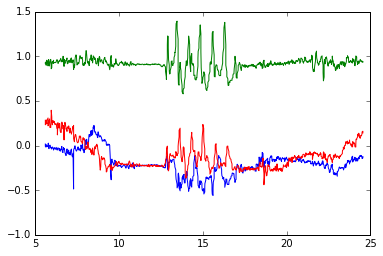

In [14]:
plot_worksheet('./data/Du_fri/上樓梯測試.xlsx', 15)

In [28]:
import xlrd
import csv
import numpy as np

value_list = ['X(g)', 'Y(g)', 'Z(g)', 'Theta(deg)', 'Phi(deg)']

def xls_to_records(path):
    '''read in xlsx file and parse worksheets to form matrix records
    
    Notes: columns are ['Number', 'X(g)', 'Y(g)', 'Z(g)', 'R(g)', 'Theta(deg)', 'Phi(deg)']
    
    Args: path
    
    Return: 
    
    '''
    record_all_list = []
    workbook = xlrd.open_workbook(path)
    for sheet_name in workbook.sheet_names()[:15]:
        print 'processing workshet {}'.format(sheet_name)
        # print(sheet_name)
        worksheet = workbook.sheet_by_name(sheet_name)
        temp_file = 'temp.csv'
        csvfile = open(temp_file, 'w')
        wr = csv.writer(csvfile, quoting=csv.QUOTE_ALL)
        for rownum in range(worksheet.nrows):
            wr.writerow(worksheet.row_values(rownum))
        
        csvfile.close()
        
        testDf = pd.read_csv(temp_file, skiprows=1, index_col='Time(s)')
        
        start_time = 15.0
        end_time = 20.0
        step_time = 0.25
        
        filteredDf = testDf[(testDf.index >= start_time) & (testDf.index < end_time)].copy()
        
        record_list = []
        # return filteredDf
        for i in range(10):
            window_start = start_time + i * step_time
            window_stop = start_time + 1 + i * step_time
            # print(window_start)
            # print(window_stop)
            currentDf = filteredDf[(filteredDf.index >= window_start) & 
                                   (filteredDf.index < window_stop)].copy()
            
            print currentDf.shape
        
            nextDf = filteredDf[(filteredDf.index >= window_start + step_time) &
                                (filteredDf.index < window_stop + step_time)].copy()
            
            print nextDf.shape
        
            record_values = get_record(currentDf, nextDf)
        
            record_list.append(record_values)
            
        print len(record_list)
        
        record_all_list = record_all_list + record_list
        # print(currentDf.index)
        # print(nextDf.index)
        
        # print(filteredDf.shape)
        
        g_list = ['X(g)', 'Y(g)', 'Z(g)']
        
        # plt.plot(testDf[g_list])
        
        
        # print(testDf.shape)
        
    return np.array(record_all_list)

In [56]:
X = np.arange(6).reshape(3, 2)


In [58]:
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [59]:
poly = PolynomialFeatures(2)

In [64]:
y = poly.fit_transform(X)
y

array([[  1.,   0.,   1.,   0.],
       [  1.,   2.,   3.,   6.],
       [  1.,   4.,   5.,  20.]])

In [62]:
poly = PolynomialFeatures(interaction_only=True)

In [63]:
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.],
       [  1.,   2.,   3.,   6.],
       [  1.,   4.,   5.,  20.]])

In [26]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def get_record(currentDf, nextDf):
    '''
    '''
    
    value_list = ['X(g)', 'Y(g)', 'Z(g)', 'Theta(deg)', 'Phi(deg)']
    # mean, absolute value of the mean, standard deviation, skew, kurtosis
    means = currentDf.mean()[value_list].values
    abs_means = np.abs(currentDf.mean())[value_list].values
    stds = currentDf.std()[value_list].values
    skews = currentDf.skew()[value_list].values
    kurtosiss = currentDf.kurtosis()[value_list].values
    # mean, standard deviation, skew, kurtosis differences between successive samples
    diff_means = means - nextDf.mean()[value_list].values
    diff_stds = stds - nextDf.std()[value_list].values
    diff_skews = skews - nextDf.skew()[value_list].values
    diff_kurtosiss = kurtosiss - nextDf.skew()[value_list].values
    
    # min, max, absolute value of the min and max
    mins = currentDf.min()[value_list].values
    maxs = currentDf.max()[value_list].values
    abs_mins = np.abs(mins)
    abs_maxs = np.abs(maxs)
    
    # mean of the cross product
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    cross_products = poly.fit_transform(currentDf[value_list])[:, 5:].mean(axis=0)
    abs_cross_products = np.abs(cross_products)
    
    final_record = np.concatenate((means, abs_means, stds, skews, kurtosiss,
                                  diff_means, diff_stds, diff_skews, diff_kurtosiss,
                                  mins, maxs, abs_mins, abs_maxs,
                                  cross_products, abs_cross_products))
    
    return final_record

In [29]:
record_test = xls_to_records('./data/Du_fri/上樓梯測試.xlsx')

processing workshet 1
(50, 7)
(50, 7)
(50, 7)
(49, 7)
(49, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
10
processing workshet 2
(49, 7)
(50, 7)
(50, 7)
(48, 7)
(48, 7)
(51, 7)
(51, 7)
(51, 7)
(51, 7)
(49, 7)
(49, 7)
(51, 7)
(51, 7)
(49, 7)
(49, 7)
(49, 7)
(49, 7)
(50, 7)
(50, 7)
(50, 7)
10
processing workshet 3
(49, 7)
(49, 7)
(49, 7)
(51, 7)
(51, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(51, 7)
(51, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(49, 7)
10
processing workshet 4
(48, 7)
(48, 7)
(48, 7)
(48, 7)
(48, 7)
(49, 7)
(49, 7)
(49, 7)
(49, 7)
(49, 7)
(49, 7)
(49, 7)
(49, 7)
(50, 7)
(50, 7)
(49, 7)
(49, 7)
(48, 7)
(48, 7)
(48, 7)
10
processing workshet 5
(50, 7)
(51, 7)
(51, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(49, 7)
(49, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
(50, 7)
10
processing workshet 6
(51, 7)
(51, 7)
(51, 7)
(49, 7)
(49, 7)
(50, 7)
(50, 

In [30]:
record_test

array([[  1.61897816e-01,   9.32708689e-01,  -1.74022578e-01, ...,
          1.76481089e+01,   1.40266461e+01,   8.06479133e+03],
       [  1.58773884e-01,   9.29487146e-01,  -1.46902937e-01, ...,
          1.48056641e+01,   1.19072101e+01,   7.95828208e+03],
       [  1.68270002e-01,   1.00812579e+00,  -1.16509940e-01, ...,
          1.15545318e+01,   9.46141855e+00,   7.79145478e+03],
       ..., 
       [ -3.63567205e-01,   8.66930389e-01,  -1.27554080e-01, ...,
          1.32679618e+01,   1.40445957e+01,   1.10244512e+04],
       [ -3.94626218e-01,   8.91163067e-01,  -9.98624837e-02, ...,
          1.04336161e+01,   1.11797038e+01,   1.09441582e+04],
       [ -3.57006944e-01,   8.73197771e-01,  -1.09005729e-01, ...,
          1.11411624e+01,   1.22016907e+01,   1.08629102e+04]])

In [34]:
record_test_np = np.array(record_test)

In [36]:
len(record_test_np[0])

85

In [32]:
np.array(record_test).shape

(150, 85)

In [73]:
len(record_test)

85

In [40]:
testDf = dataset[(dataset.index >= 15) & (dataset.index < 20)].copy()

NameError: name 'dataset' is not defined

In [ ]:
currentDf = testDf[(testDf.index > 15) & (testDf.index < 16)].copy()

In [ ]:
nextDf = testDf[(testDf.index > 15.25) & (testDf.index < 16.25)].copy()

In [53]:
test_record = get_record(currentDf, nextDf)

In [54]:
test_record.shape

(85,)

In [55]:
np.concatenate((means, stds, skews, kurtosiss)) 

NameError: name 'means' is not defined

In [289]:
from sklearn.preprocessing import PolynomialFeatures

In [290]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

In [298]:
poly.fit_transform(currentDf[value_list])[:,5:].mean(axis=0)

array([  1.52203058e-01,  -2.66817095e-02,   1.61763024e+01,
         1.28945870e+01,  -1.60909874e-01,   9.36407116e+01,
         7.47731357e+01,  -1.76481089e+01,  -1.40266461e+01,
         8.06479133e+03])

In [259]:
means = currentDf.mean()[value_list].values

In [260]:
abs_means = np.abs(currentDf.mean())[value_list].values

In [263]:
stds = currentDf.std()[value_list].values

In [264]:
stds

array([ 0.0427327 ,  0.05384582,  0.05165335,  3.15112061,  2.23821513])

In [267]:
skews = currentDf.skew()[value_list].values

In [269]:
kurtosiss = currentDf.kurtosis()[value_list].values

In [272]:
currentDf.shape

(50, 6)

In [273]:
nextDf.shape

(50, 6)

In [274]:
small_num = min(len(currentDf), len(nextDf))

In [276]:
small_num

50

In [270]:
kurtosiss

array([ 0.28562116,  4.54774519,  3.11287276,  3.36687835, -0.55924904])

In [268]:
skews

array([ 0.44385526,  1.51087325,  2.03975668, -2.07655595,  0.30915737])

In [261]:
abs_means

array([   0.16189782,    0.93270869,    0.17402258,  100.50046564,
         80.2035611 ])

In [262]:
means

array([   0.16189782,    0.93270869,   -0.17402258,  100.50046564,
         80.2035611 ])

In [243]:
xls_to_records('./data/Du_fri/上樓梯測試.xlsx')

15.25
16.25
Float64Index([ 15.254001,  15.274001,  15.313001,  15.314001,  15.354001,
               15.354001,     15.402,     15.402, 15.4140005,  15.443001,
                  15.454,  15.490001,     15.494,  15.536001,  15.536001,
               15.583001,  15.583001,  15.594001,  15.630001,  15.634001,
                  15.678,     15.678,  15.694001,  15.722001,  15.734001,
                  15.765,  15.774001,     15.812,  15.814001,     15.862,
                  15.862,  15.874001,  15.913001,  15.915001,     15.963,
                  15.963,  15.974001,     16.013,     16.014,     16.062,
               16.064001,     16.104,     16.104,  16.143002,  16.144001,
                  16.187,  16.188002,     16.204,  16.237001,  16.244001],
             dtype='float64', name='Time(s)')
Float64Index([15.536001, 15.536001, 15.583001, 15.583001, 15.594001, 15.630001,
              15.634001,    15.678,    15.678, 15.694001, 15.722001, 15.734001,
                 15.765, 15.774001,    15

In [51]:
workbook = xlrd.open_workbook('./data/Du_fri/上樓梯測試.xlsx')

In [52]:
name_test = workbook.sheet_names()[0]

In [53]:
worksheet = workbook.sheet_by_name(name_test)

In [42]:
with open('test.csv', 'w') as csvfile:
    wr = csv.writer(csvfile, quoting=csv.QUOTE_ALL)
    for rownum in range(worksheet.nrows):
        wr.writerow(worksheet.row_values(rownum))
        # print(type(worksheet.row_values(rownum)))

In [43]:
import pandas as pd

In [44]:
dataset = pd.read_csv('./test.csv', skiprows=1, index_col='Time(s)')

In [45]:
del dataset['Number']

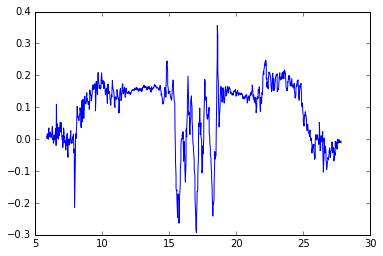

In [46]:
plt.plot(dataset['X(g)'])

In [47]:
import matplotlib.pyplot as plt

In [48]:
%matplotlib inline

In [49]:
testDf = dataset[(dataset.index >= 15) & (dataset.index < 20)].copy()

In [50]:
currentDf = testDf[(testDf.index > 15) & (testDf.index < 16)].copy()

In [51]:
nextDf = testDf[(testDf.index > 15.25) & (testDf.index < 16.25)].copy()

In [144]:
g_list = ['X(g)', 'Y(g)', 'Z(g)']

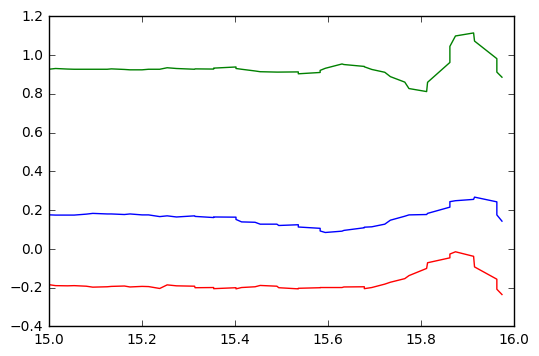

In [145]:
plt.plot(currentDf[g_list])

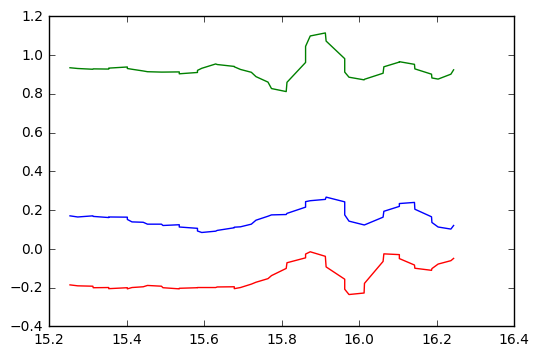

In [146]:
plt.plot(nextDf[g_list])

In [150]:
currentDf.shape

(50, 6)

In [168]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [171]:
currentDf.index = list(range(len(currentDf)))

In [173]:
nextDf.index = list(range(len(nextDf)))

In [176]:
from sklearn.preprocessing import PolynomialFeatures

In [177]:
poly = PolynomialFeatures(interaction_only=True)

In [188]:
poly.fit_transform(currentDf[g_list])[:,4:].mean(axis=0)

array([ 0.15220306, -0.02668171, -0.16090987])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feeac088128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fee8be5ceb8>]], dtype=object)

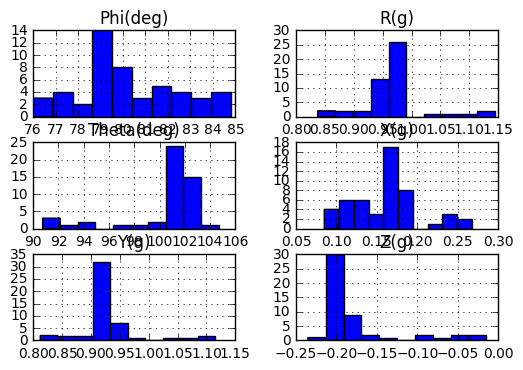

In [189]:
currentDf.hist()

In [129]:
import numpy as np

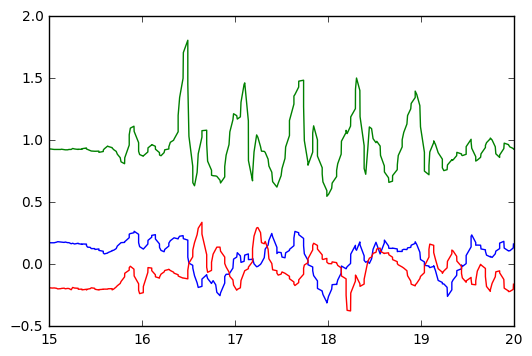

In [137]:
plt.plot(testDf[['X(g)', 'Y(g)', 'Z(g)']])

In [130]:
testDf.skew()

X(g)         -0.873977
Y(g)          1.116846
Z(g)          0.578838
R(g)          1.125174
Theta(deg)   -0.605122
Phi(deg)      1.250313
dtype: float64

In [131]:
testDf.kurtosis()

X(g)         -0.042225
Y(g)          2.014529
Z(g)          0.091407
R(g)          1.971788
Theta(deg)   -0.123584
Phi(deg)      1.306923
dtype: float64

In [132]:
np.abs(testDf.mean())

X(g)           0.067168
Y(g)           0.954999
Z(g)           0.056625
R(g)           0.976456
Theta(deg)    92.967822
Phi(deg)      86.551468
dtype: float64

In [133]:
testDf.mean()

X(g)           0.067168
Y(g)           0.954999
Z(g)          -0.056625
R(g)           0.976456
Theta(deg)    92.967822
Phi(deg)      86.551468
dtype: float64

In [122]:
testDf.std()

X(g)          0.038479
Y(g)          0.050440
Z(g)          0.150602
R(g)          0.042242
Theta(deg)    8.904922
Phi(deg)      2.256170
dtype: float64

In [76]:
type(dataset['Time(s)'].iloc[0])

numpy.float64

In [78]:
type(dataset['X(g)'].iloc[0])

numpy.float64

In [79]:
dataset

,Time(s),X(g),Y(g),Z(g),R(g),Theta(deg),Phi(deg)
Number,,,,,,,
1.0,10.062000,-0.046859,0.893250,0.251867,0.929262,74.273840,93.002930
2.0,10.062000,-0.043930,0.926441,0.246010,0.959554,75.144680,92.714836
3.0,10.074000,-0.050764,0.918631,0.257724,0.955449,74.351100,93.162970
4.0,10.100000,-0.029287,0.920584,0.293845,0.966787,72.305620,91.822160
5.0,10.135000,-0.044907,0.931322,0.270415,0.970826,73.826810,92.760550
6.0,10.135000,-0.048811,0.927417,0.250891,0.961994,74.882286,93.012790
7.0,10.167001,-0.014643,0.984039,0.254796,1.016596,75.484840,90.852554
8.0,10.178000,-0.054669,0.932299,0.285059,0.976436,73.025986,93.355910
9.0,10.201000,-0.084932,0.956704,0.292869,1.004126,73.042320,95.073166


In [197]:
type(np.fft.fft(currentDf['X(g)'])[0])

numpy.complex128